In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pytidycensus as tc
import requests

C:\Users\lukem\AppData\Local\Temp\ipykernel_40476\3992969218.py:5: UserWarning: Mapping functions unavailable due to import error: NameError. To use mapping features, ensure all dependencies are properly installed: pip install pytidycensus[map]
  import pytidycensus as tc


In [2]:
redfin_metro = pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data\redfin_data.csv',encoding='utf-16',sep='\t')

In [3]:
redfin_metro['Median Sale Price'] = (redfin_metro['Median Sale Price'].str.replace('$','').str.replace('K','000').astype(float))

In [4]:
cols = ['Homes Sold', 'New Listings', 'Inventory']
for col in cols:
    redfin_metro[col] = redfin_metro[col].str.replace(',', '').astype(int)

In [5]:
redfin_metro['Month of Period End'] = pd.to_datetime(redfin_metro['Month of Period End'],format='%B %Y')

In [6]:
redfin_metro['Year'] = redfin_metro['Month of Period End'].dt.year

In [7]:
redfin_metro = redfin_metro[(redfin_metro['Year'] >= 2020) & (redfin_metro['Year'] <= 2023)]

In [8]:
redfin_metro.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,...,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,Year
83,"Nashville, TN metro area",2020-01-01,300000.0,-5.7%,2.9%,2195,-25.1%,16.2%,3092,57.4%,...,8572,2.5%,-7.6%,73,9.0,0.0,98.3%,-0.1%,0.3%,2020
84,"Nashville, TN metro area",2020-02-01,315000.0,5.0%,8.6%,2431,10.8%,15.3%,2998,-3.0%,...,8607,0.4%,-8.3%,72,-1.0,-6.0,98.5%,0.2%,0.1%,2020
85,"Nashville, TN metro area",2020-03-01,326000.0,3.4%,8.5%,2953,21.5%,7.5%,3756,25.3%,...,9043,5.1%,-6.0%,63,-9.0,-3.0,99.0%,0.4%,0.5%,2020
86,"Nashville, TN metro area",2020-04-01,327000.0,0.4%,7.7%,2579,-12.7%,-13.0%,3466,-7.7%,...,9535,5.4%,-7.5%,56,-7.0,-1.0,99.1%,0.1%,0.6%,2020
87,"Nashville, TN metro area",2020-05-01,325000.0,-0.6%,4.3%,2820,9.3%,-19.8%,3713,7.1%,...,9838,3.2%,-7.8%,53,-3.0,-3.0,98.9%,-0.2%,0.2%,2020


In [9]:
redfin_zip = pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data\zip_code_market_tracker.tsv000',sep='\t',encoding='utf-8',low_memory=False)

In [10]:
redfin_zip['PERIOD_END'] = pd.to_datetime(redfin_zip['PERIOD_END'])
redfin_zip['PERIOD_BEGIN'] = pd.to_datetime(redfin_zip['PERIOD_BEGIN'])

In [11]:
redfin_zip = redfin_zip[redfin_zip['REGION_TYPE'] == 'zip code']

In [12]:
redfin_zip = redfin_zip[redfin_zip['PARENT_METRO_REGION'] == 'Nashville, TN']

In [13]:
redfin_zip = redfin_zip[redfin_zip['PROPERTY_TYPE'] == 'Single Family Residential']

In [14]:
redfin_zip = redfin_zip[(redfin_zip['PERIOD_END'].dt.year >= 2020) &(redfin_zip['PERIOD_END'].dt.year <= 2023)]

In [15]:
redfin_zip['ZIP'] = (redfin_zip['REGION'].str.replace('Zip Code: ', '', regex=False).str.zfill(5))

In [16]:
redfin_zip['Year'] = redfin_zip['PERIOD_END'].dt.year
redfin_zip['Month'] = redfin_zip['PERIOD_END'].dt.month

In [17]:
metro_nashville_zips = ['37201','37203','37204','37205','37206','37207',
                        '37208','37209','37210','37211','37212','37214',
                        '37215','37216','37217','37218','37220','37221',
                        '37127','37128','37129','37130','37027','37064',
                        '37067','37069','37066','37075','37076','37087',
                        '37122']

In [18]:
redfin_zip = redfin_zip[redfin_zip['ZIP'].isin(metro_nashville_zips)]

In [19]:
redfin_zip

,PERIOD_BEGIN,PERIOD_END,PERIOD_DURATION,REGION_TYPE,REGION_TYPE_ID,TABLE_ID,IS_SEASONALLY_ADJUSTED,REGION,CITY,STATE,...,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION,PARENT_METRO_REGION_METRO_CODE,LAST_UPDATED,ZIP,Year,Month
1757,2023-08-01,2023-10-31,90,zip code,2,15686,False,Zip Code: 37087,NaN,Tennessee,...,NaN,0.334975,0.026032,-0.081055,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37087,2023,10
3043,2020-08-01,2020-10-31,90,zip code,2,15704,False,Zip Code: 37127,NaN,Tennessee,...,NaN,0.765306,0.089868,0.386928,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37127,2020,10
23522,2023-07-01,2023-09-30,90,zip code,2,15760,False,Zip Code: 37209,NaN,Tennessee,...,NaN,0.452555,-0.054798,-0.096741,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37209,2023,9
42416,2022-07-01,2022-09-30,90,zip code,2,15704,False,Zip Code: 37127,NaN,Tennessee,...,NaN,0.371429,-0.146557,-0.391283,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37127,2022,9
49276,2023-02-01,2023-04-30,90,zip code,2,15676,False,Zip Code: 37075,NaN,Tennessee,...,NaN,0.436090,0.080878,-0.395370,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37075,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338495,2021-07-01,2021-09-30,90,zip code,2,15759,False,Zip Code: 37208,NaN,Tennessee,...,NaN,0.534884,-0.085369,0.116080,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37208,2021,9
9339199,2022-08-01,2022-10-31,90,zip code,2,15772,False,Zip Code: 37221,NaN,Tennessee,...,NaN,0.453846,-0.060238,-0.293213,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37221,2022,10
9345578,2023-01-01,2023-03-31,90,zip code,2,15769,False,Zip Code: 37218,NaN,Tennessee,...,NaN,0.362069,0.100164,-0.323645,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37218,2023,3
9347046,2020-09-01,2020-11-30,90,zip code,2,15705,False,Zip Code: 37128,NaN,Tennessee,...,NaN,0.608315,0.019744,0.202447,"Nashville, TN",34980,2025-12-15 14:55:40.754 Z,37128,2020,11


In [20]:
mortgage_rate=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/mortgage_rate_30.csv')

In [21]:
mortgage_rate['observation_date'] = pd.to_datetime(mortgage_rate['observation_date'])

In [22]:
mortgage_rate['Year'] = mortgage_rate['observation_date'].dt.year
mortgage_rate['Month_Name'] = mortgage_rate['observation_date'].dt.month_name()

In [23]:
mortgage_rate = mortgage_rate[(mortgage_rate['Year'] >= 2020) & (mortgage_rate['Year'] <= 2023)]

In [24]:
mortgage_rate = mortgage_rate.reset_index(drop=True)

In [25]:
mortgage_rate.head()

,observation_date,MORTGAGE30US,Year,Month_Name
0,2020-01-02,3.72,2020,January
1,2020-01-09,3.64,2020,January
2,2020-01-16,3.65,2020,January
3,2020-01-23,3.60,2020,January
4,2020-01-30,3.51,2020,January


In [26]:
API_KEY = '5206a3fd5690e9a1ab1ce6fb7d2fbdbd52895891'

In [27]:
zip_codes = ['37201','37203','37204','37205','37206','37207',
             '37208','37209','37210','37211','37212','37214',
             '37215','37216','37217','37218','37220','37221',
             '37127','37128','37129','37130','37027','37064',
             '37067','37069','37066','37075','37076','37087',
             '37122']

In [28]:
variables = {
    'B01003_001E': 'Population',
    'B19013_001E': 'MedianIncome',
    'B25077_001E': 'MedianHomeValue',
    'B25064_001E': 'MedianRent',
    'B25002_001E': 'TotalHousingUnits',
    'B25003_002E': 'OccupiedUnits',
    'B25003_003E': 'VacantUnits',
    'B17001_001E': 'PovertyUniverse',
    'B17001_002E': 'BelowPoverty'}

In [29]:
years = ['2020', '2021', '2022', '2023']

In [30]:
def get_acs_data(year):
    base_url = f'https://api.census.gov/data/{year}/acs/acs5'
    all_data = []
    for zcta in zip_codes:
        response = requests.get(base_url, params={
            'get': ','.join(variables.keys()),
            'for': f'zip code tabulation area:{zcta}',
            'key': API_KEY})
        if response.status_code == 200 and len(response.json()) > 1:
            row = response.json()[1]
            record = {'ZCTA': zcta, 'ACS_Year': year}
            for i, var in enumerate(variables.keys()):
                record[variables[var]] = row[i]
            all_data.append(record)
        else:
            print(f'No data for ZCTA {zcta} in {year}')
    return pd.DataFrame(all_data)

In [31]:
df_list = []
for year in years:
    print(f'Pulling ACS {year} data...')
    df_year = get_acs_data(year)
    df_list.append(df_year)
census_data = pd.concat(df_list, ignore_index=True)

Pulling ACS 2020 data...
Pulling ACS 2021 data...
Pulling ACS 2022 data...
Pulling ACS 2023 data...


In [32]:
census_data

,ZCTA,ACS_Year,Population,MedianIncome,MedianHomeValue,MedianRent,TotalHousingUnits,OccupiedUnits,VacantUnits,PovertyUniverse,BelowPoverty
0,37201,2020,1745,92827,374500,1762,1418,368,252,861,173
1,37203,2020,16772,58032,380200,1564,13302,1828,8373,16111,3573
2,37204,2020,15908,89954,602500,1477,6907,3451,2629,14139,1050
3,37205,2020,23680,107876,613300,1492,11872,7379,3620,23134,1208
4,37206,2020,27055,66065,359600,1126,13034,5763,5821,26485,5286
...,...,...,...,...,...,...,...,...,...,...,...
119,37066,2023,62404,78049,376100,1305,25939,15903,8558,61258,7016
120,37075,2023,72541,97597,403400,1552,29600,20505,7523,72018,4656
121,37076,2023,38124,74555,348300,1438,19235,9890,7937,37883,4217
122,37087,2023,55235,80978,359900,1134,21800,14362,5917,53325,6246


In [33]:
census_data['ZCTA'] = census_data['ZCTA'].astype(int)

In [34]:
numeric_cols = [
    'ACS_Year',
    'Population',
    'MedianIncome',
    'MedianHomeValue',
    'MedianRent',
    'TotalHousingUnits',
    'OccupiedUnits',
    'VacantUnits',
    'PovertyUniverse',
    'BelowPoverty']

In [35]:
for col in numeric_cols:
    census_data[col] = pd.to_numeric(census_data[col], errors='coerce')

In [36]:
census_data = census_data.replace(-666666666, pd.NA)

* Total homes sales over the span of the dataset 2020-2023

In [106]:
total_home_sales_2020 = redfin_metro.loc[redfin_metro['Year'] == 2020, 'Homes Sold'].sum()

In [107]:
print(total_home_sales_2020)

38234


In [110]:
total_home_sales_2023 = redfin_metro.loc[redfin_metro['Year'] == 2023, 'Homes Sold'].sum()

In [111]:
print(total_home_sales_2023)

26570


* Average number of home sales per year 

In [39]:
avg_homes_per_year = total_home_sales / redfin_metro['Year'].nunique()

In [40]:
print(avg_homes_per_year)

33368.5


* Median Home sale price for the yeaar 2020 and 2023

In [41]:
median_2020 = redfin_metro.loc[redfin_metro['Year'] == 2020, 'Median Sale Price'].median()
median_2023 = redfin_metro.loc[redfin_metro['Year'] == 2023, 'Median Sale Price'].median()

In [42]:
print(median_2020)

334500.0


In [43]:
print(median_2023)

470000.0


* Average median icome of residents in Metro Nashville

In [44]:
avg_median_income_2020 = (census_data.loc[census_data['ACS_Year'] == 2020, 'MedianIncome'].mean().round(2))

In [45]:
print(avg_median_income_2020)

77463.39


In [46]:
avg_median_income_2023 = (census_data.loc[census_data['ACS_Year'] == 2023, 'MedianIncome'].mean().round(2))

In [47]:
print(avg_median_income_2023)

92526.52


* Average population during this span

In [48]:
population_by_year = (census_data.groupby('ACS_Year')['Population'].sum().reset_index())

In [49]:
avg_population = population_by_year['Population'].mean()

In [50]:
print(avg_population)

1135146.75


* Average Mortagae rate for a 30 year fixed loan

In [112]:
avg_mortgage_rate_2020 = (mortgage_rate.loc[mortgage_rate['Year'] == 2020, 'MORTGAGE30US'].mean().round(2))

In [113]:
print(avg_mortgage_rate_2020)

3.11


In [114]:
avg_mortgage_rate_2023 = (mortgage_rate.loc[mortgage_rate['Year'] == 2023, 'MORTGAGE30US'].mean().round(2))

In [115]:
print(avg_mortgage_rate_2023)

6.81


1. How did median home sale prices in the Metro Nashville area change between 2020 and 2023, and did household income growth keep pace with these changes?

In [53]:
sale_price_trends = (redfin_metro.groupby('Year')['Median Sale Price'].median().reset_index(name='Median_Sale_Price'))

In [54]:
sale_price_trends

,Year,Median_Sale_Price
0,2020,334500.0
1,2021,409000.0
2,2022,471000.0
3,2023,470000.0


In [55]:
income_trends = (census_data.groupby('ACS_Year')['MedianIncome'].median().reset_index(name='Median_Income').rename(columns={'ACS_Year': 'Year'}))

In [56]:
income_trends

,Year,Median_Income
0,2020,71059.0
1,2021,77089.0
2,2022,81270.0
3,2023,86461.0


In [57]:
metro_trends = sale_price_trends.merge(income_trends,on='Year',how='inner')

In [58]:
metro_trends

,Year,Median_Sale_Price,Median_Income
0,2020,334500.0,71059.0
1,2021,409000.0,77089.0
2,2022,471000.0,81270.0
3,2023,470000.0,86461.0


In [59]:
price_growth = ((metro_trends.loc[metro_trends['Year'] == 2023, 'Median_Sale_Price'].values[0] /metro_trends.loc[metro_trends['Year'] == 2020, 'Median_Sale_Price'].values[0] - 1)* 100)

In [60]:
print(price_growth)

40.50822122571


In [61]:
income_growth = ((metro_trends.loc[metro_trends['Year'] == 2023, 'Median_Income'].values[0] /metro_trends.loc[metro_trends['Year'] == 2020, 'Median_Income'].values[0] - 1)* 100)

In [62]:
print(income_growth)

21.674946171491307


In [63]:
metro_trends['Price_to_Income_Ratio'] = ((metro_trends['Median_Sale_Price'] /metro_trends['Median_Income']).round(2))

In [64]:
metro_trends

,Year,Median_Sale_Price,Median_Income,Price_to_Income_Ratio
0,2020,334500.0,71059.0,4.71
1,2021,409000.0,77089.0,5.31
2,2022,471000.0,81270.0,5.80
3,2023,470000.0,86461.0,5.44


In [65]:
from matplotlib.ticker import FuncFormatter

In [66]:
def dollar_format(x, pos):
    return f'${x:,.0f}'
formatter = FuncFormatter(dollar_format)

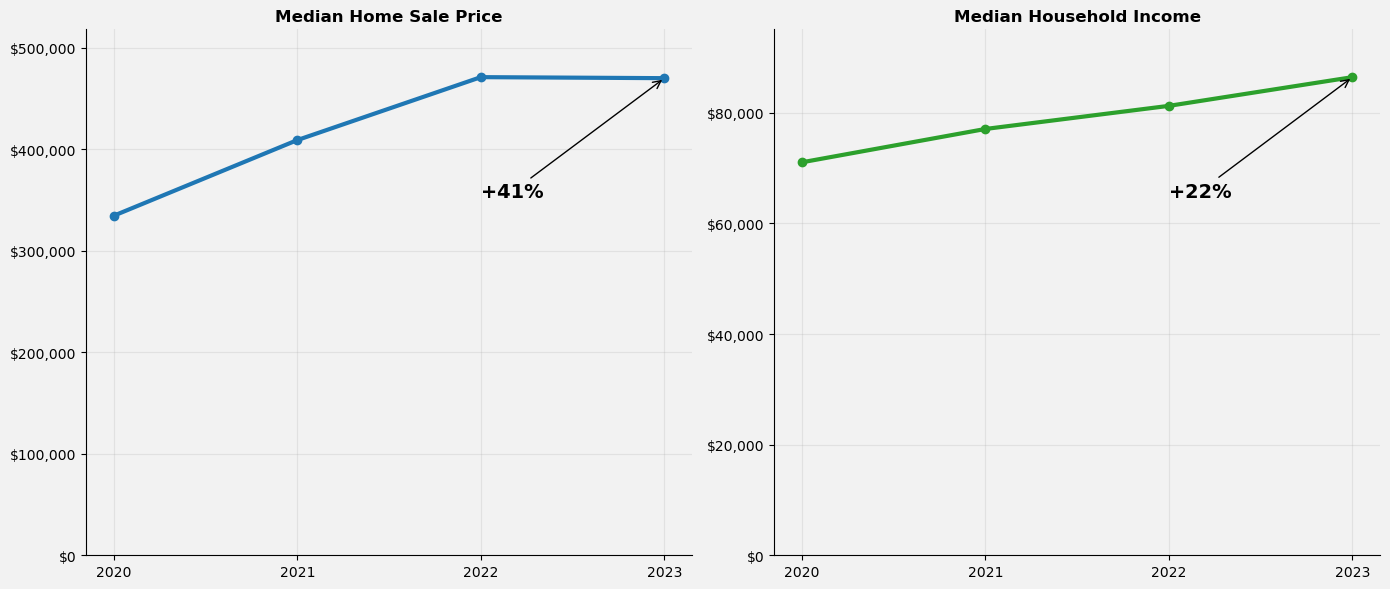

In [150]:
plt.figure(figsize=(14, 6), facecolor='#F2F2F2')
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    metro_trends['Year'],
    metro_trends['Median_Sale_Price'],
    linewidth=3,
    color='#1F77B4',
    marker='o')
plt.title('Median Home Sale Price', fontweight='bold')
plt.xticks(metro_trends['Year'])
plt.ylim(0, metro_trends['Median_Sale_Price'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.25)
price_growth = (
    (metro_trends['Median_Sale_Price'].iloc[-1] -
     metro_trends['Median_Sale_Price'].iloc[0]) /
     metro_trends['Median_Sale_Price'].iloc[0]) * 100
plt.annotate(
    f"+{price_growth:.0f}%",
    xy=(metro_trends['Year'].iloc[-1],
        metro_trends['Median_Sale_Price'].iloc[-1]),
    xytext=(metro_trends['Year'].iloc[-2],
            metro_trends['Median_Sale_Price'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle='->'),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 2, 2)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    metro_trends['Year'],
    metro_trends['Median_Income'],
    linewidth=3,
    color='#2CA02C',
    marker='o')
plt.title('Median Household Income', fontweight='bold')
plt.xticks(metro_trends['Year'])
plt.ylim(0, metro_trends['Median_Income'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.25)
income_growth = (
    (metro_trends['Median_Income'].iloc[-1] -
     metro_trends['Median_Income'].iloc[0]) /
     metro_trends['Median_Income'].iloc[0]) * 100
plt.annotate(
    f"+{income_growth:.0f}%",
    xy=(metro_trends['Year'].iloc[-1],
        metro_trends['Median_Income'].iloc[-1]),
    xytext=(metro_trends['Year'].iloc[-2],
            metro_trends['Median_Income'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle='->'),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_6.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

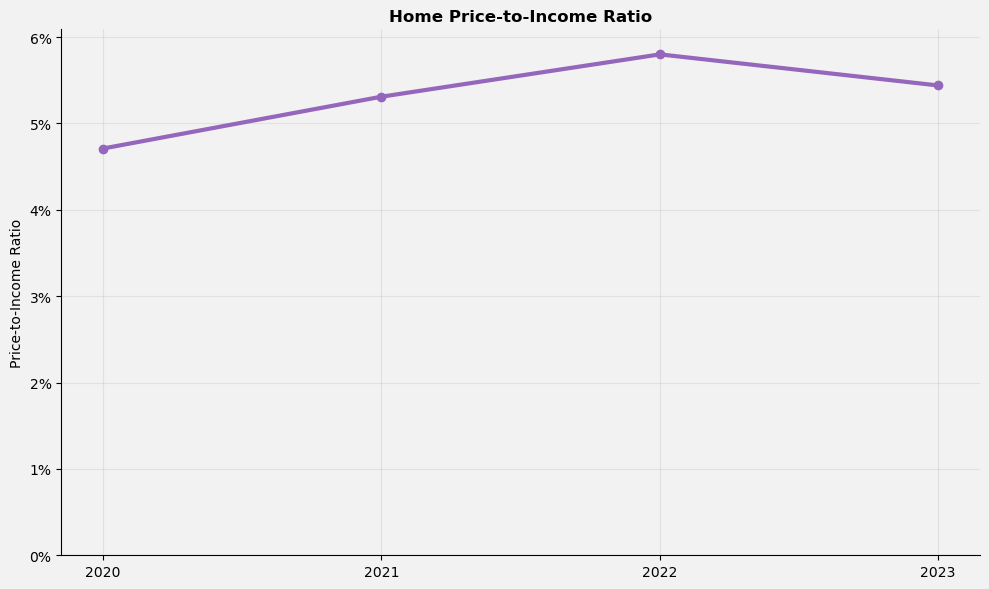

In [151]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    metro_trends['Year'],
    metro_trends['Price_to_Income_Ratio'],
    linewidth=3,
    color='#9467BD',
    marker='o')
plt.title('Home Price-to-Income Ratio', fontweight='bold')
plt.ylabel('Price-to-Income Ratio')
plt.xticks(metro_trends['Year'])
y_max = metro_trends['Price_to_Income_Ratio'].max()
plt.ylim(0, y_max * 1.05)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{x:.0f}%')
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_7.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

2. How did housing supply conditions measured by inventory levels and homes sold change between 2020 and 2023, and how did these trends relate to rising home prices in Metro Nashville?

In [125]:
yearly_supply = (redfin_metro.groupby('Year').agg(
        Inventory_Avg=('Inventory', 'mean'),
        Homes_Sold_Total=('Homes Sold', 'sum'),
        Homes_Sold_Avg_Month=('Homes Sold', 'mean'),
        Days_on_Market_Median=('Days on Market', 'median'),
        Median_Sale_Price=('Median Sale Price', 'median')).reset_index())

In [126]:
yearly_supply

,Year,Inventory_Avg,Homes_Sold_Total,Homes_Sold_Avg_Month,Days_on_Market_Median,Median_Sale_Price
0,2020,7869.916667,38234,3186.166667,49.0,334500.0
1,2021,4234.333333,37286,3107.166667,29.0,409000.0
2,2022,5637.666667,31384,2615.333333,31.5,471000.0
3,2023,6858.750000,26570,2214.166667,53.0,470000.0


In [127]:
metro_income = (census_data.groupby('ACS_Year')['MedianIncome'].median().reset_index(name='Median_Income').rename(columns={'ACS_Year': 'Year'}))

In [128]:
metro_income

,Year,Median_Income
0,2020,71059.0
1,2021,77089.0
2,2022,81270.0
3,2023,86461.0


In [129]:
affordability = yearly_supply.merge(metro_income, on='Year', how='inner')

In [130]:
affordability['Price_to_Income_Ratio'] = (affordability['Median_Sale_Price'] / affordability['Median_Income'])

In [131]:
affordability

,Year,Inventory_Avg,Homes_Sold_Total,Homes_Sold_Avg_Month,Days_on_Market_Median,Median_Sale_Price,Median_Income,Price_to_Income_Ratio
0,2020,7869.916667,38234,3186.166667,49.0,334500.0,71059.0,4.707356
1,2021,4234.333333,37286,3107.166667,29.0,409000.0,77089.0,5.305556
2,2022,5637.666667,31384,2615.333333,31.5,471000.0,81270.0,5.795496
3,2023,6858.750000,26570,2214.166667,53.0,470000.0,86461.0,5.435977


In [132]:
dollar = FuncFormatter(lambda x, pos: f'${x:,.0f}')
comma = FuncFormatter(lambda x, pos: f'{x:,.0f}')

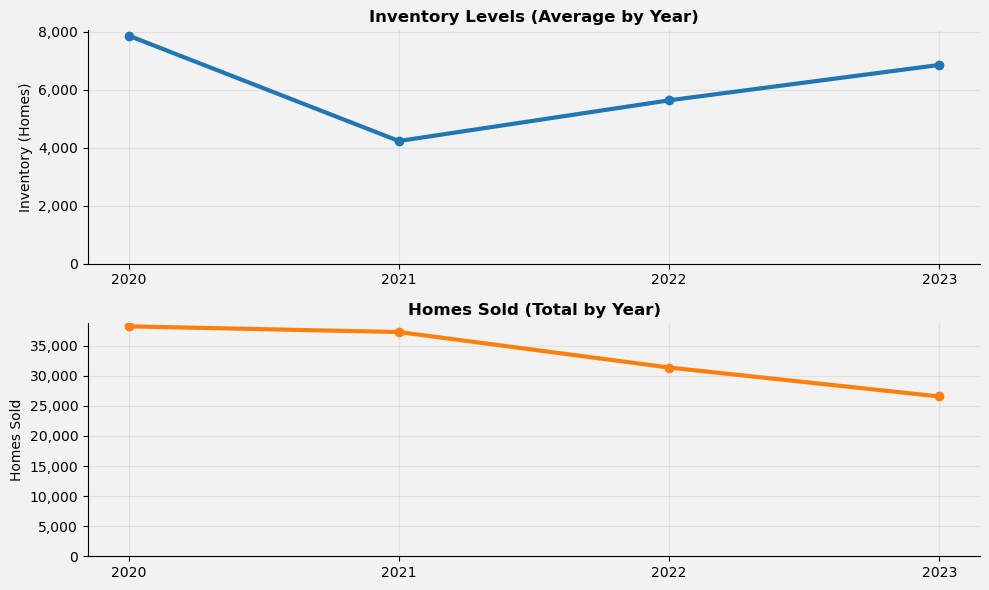

In [152]:
plt.figure(facecolor='#F2F2F2', figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    affordability['Year'],
    affordability['Inventory_Avg'],
    linewidth=3,
    color='#1F77B4',
    marker='o')
plt.title('Inventory Levels (Average by Year)', fontweight='bold')
plt.ylabel('Inventory (Homes)')
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(comma)
plt.xticks(affordability['Year'])
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 1, 2)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    affordability['Year'],
    affordability['Homes_Sold_Total'],
    linewidth=3,
    color='#FF7F0E',
    marker='o')
plt.title('Homes Sold (Total by Year)', fontweight='bold')
plt.ylabel('Homes Sold')
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(comma)
plt.xticks(affordability['Year'])
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_8.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

In [78]:
affordability['Sale_Price_Index'] = (affordability['Median_Sale_Price'] /affordability.loc[affordability['Year'] == 2020, 'Median_Sale_Price'].values[0]) * 100

3. How did changes in 30-year fixed mortgage interest rates between 2020 and 2023 affect homeownership affordability for a median-income household in Metro Nashville, and how did the estimated affordability of a median-priced home change during this period?

In [79]:
mortgage_annual = (mortgage_rate.groupby('Year')['MORTGAGE30US'].mean().reset_index(name='Avg_30yr_Rate'))

In [80]:
mortgage_annual

,Year,Avg_30yr_Rate
0,2020,3.111698
1,2021,2.957692
2,2022,5.344038
3,2023,6.806731


In [81]:
mortgage_afford = affordability.merge(mortgage_annual, on='Year', how='inner')

In [82]:
mortgage_afford

,Year,Inventory_Median,Homes_Sold_Total,Homes_Sold_Avg_Month,Days_on_Market_Median,Median_Sale_Price,Median_Income,Price_to_Income_Ratio,Sale_Price_Index,Avg_30yr_Rate
0,2020,8265.5,38234,3186.166667,49.0,334500.0,71059.0,4.707356,100.000000,3.111698
1,2021,4304.0,37286,3107.166667,29.0,409000.0,77089.0,5.305556,122.272048,2.957692
2,2022,6324.5,31384,2615.333333,31.5,471000.0,81270.0,5.795496,140.807175,5.344038
3,2023,7020.5,26570,2214.166667,53.0,470000.0,86461.0,5.435977,140.508221,6.806731


In [83]:
def monthly_payment(price, rate, down_payment=0.20, years=30):
    loan_amount = price * (1 - down_payment)
    monthly_rate = rate / 100 / 12
    n_payments = years * 12
    return loan_amount * (monthly_rate * (1 + monthly_rate)**n_payments) / ((1 + monthly_rate)**n_payments - 1)
mortgage_afford['Monthly_Payment'] = mortgage_afford.apply(
    lambda row: monthly_payment(row['Median_Sale_Price'],row['Avg_30yr_Rate']),axis=1)

In [84]:
mortgage_afford['Monthly_Income'] = mortgage_afford['Median_Income'] / 12
mortgage_afford['Income_Share_for_Mortgage'] = (mortgage_afford['Monthly_Payment'] /mortgage_afford['Monthly_Income'])

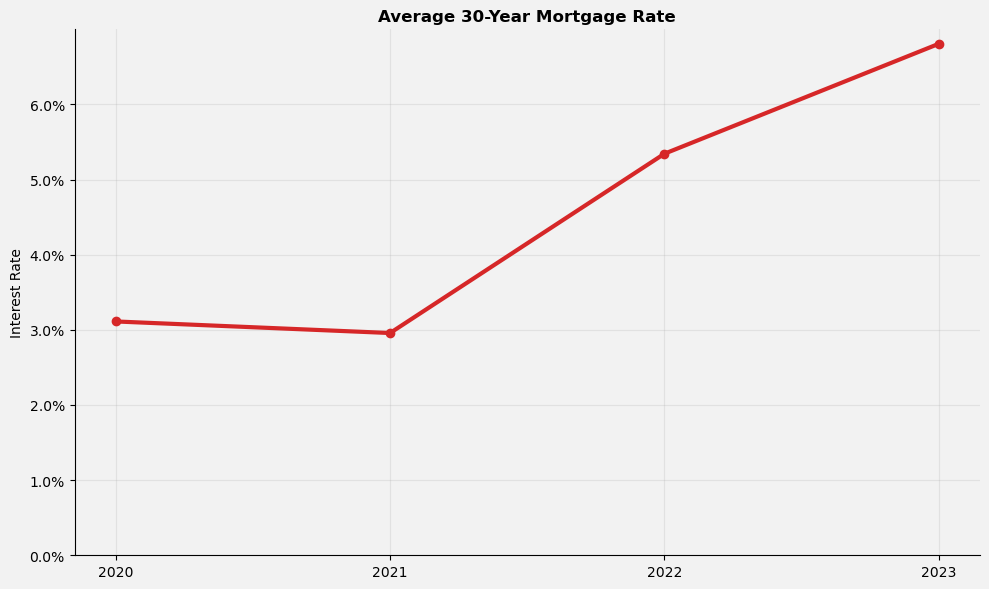

In [153]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    mortgage_afford['Year'],
    mortgage_afford['Avg_30yr_Rate'],
    linewidth=3,
    color='#D62728',
    marker='o')
plt.title('Average 30-Year Mortgage Rate', fontweight='bold')
plt.ylabel('Interest Rate')
plt.xticks(mortgage_afford['Year'])
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{x:.1f}%')
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_9.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

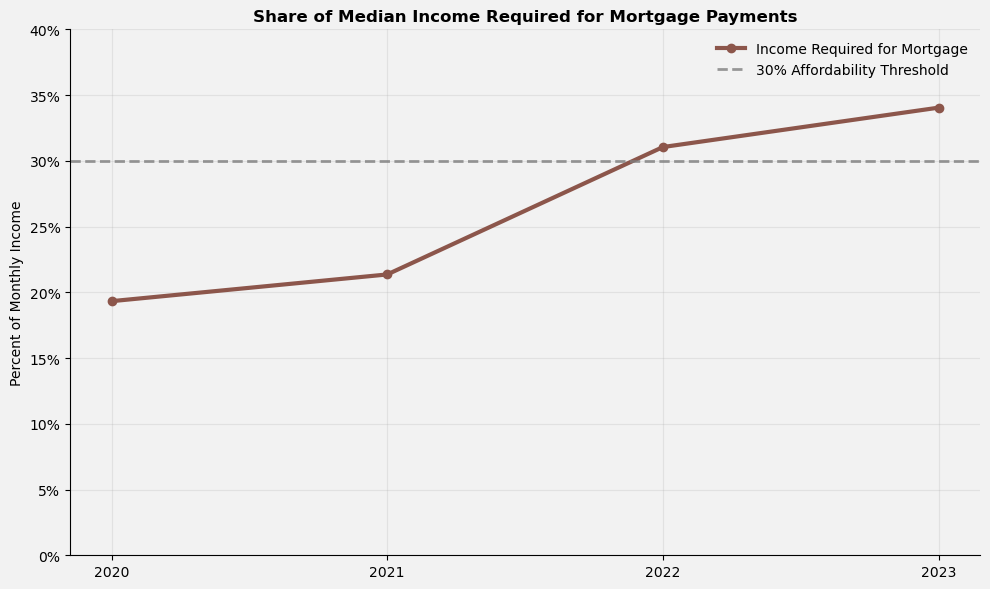

In [154]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    mortgage_afford['Year'],
    mortgage_afford['Income_Share_for_Mortgage'] * 100,
    linewidth=3,
    color='#8C564B', 
    marker='o',
    label='Income Required for Mortgage')
plt.axhline(
    30,
    linestyle='--',
    linewidth=2,
    color='#7F7F7F',
    alpha=0.8,
    label='30% Affordability Threshold')
plt.title('Share of Median Income Required for Mortgage Payments', fontweight='bold')
plt.ylabel('Percent of Monthly Income')
plt.xticks(mortgage_afford['Year'])
plt.yticks(np.arange(0, 41, 5))
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{x:.0f}%')
plt.legend(frameon=False)
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_10.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

4. Were changes in housing affordability evenly distributed across Metro Nashville between 2020 and 2023, or did certain ZIP codes experience more rapid changes in affordability pressure, as measured by changes in home sale prices relative to household income?

In [87]:
zip_prices = (redfin_zip.groupby(['ZIP','Year'])['MEDIAN_SALE_PRICE'].median().reset_index())

In [88]:
zip_prices

,ZIP,Year,MEDIAN_SALE_PRICE
0,37027,2020,690000.0
1,37027,2021,923750.0
2,37027,2022,1073500.0
3,37027,2023,1072000.0
4,37064,2020,564375.0
...,...,...,...
119,37220,2023,828750.0
120,37221,2020,389950.0
121,37221,2021,457500.0
122,37221,2022,573750.0


In [89]:
zip_prices_wide = zip_prices.pivot(index='ZIP',columns='Year',values='MEDIAN_SALE_PRICE').reset_index()

In [90]:
zip_prices_wide = zip_prices_wide[['ZIP', 2020, 2023]]

In [91]:
zip_prices_wide.columns = ['ZIP','Price_2020','Price_2023']

In [92]:
zip_prices_wide.head()

,ZIP,Price_2020,Price_2023
0,37027,690000.00,1072000.00
1,37064,564375.00,955000.00
2,37066,335186.25,462047.50
3,37067,587970.75,897500.00
4,37069,612500.00,874999.75


In [93]:
zip_income = (census_data.groupby(['ZCTA','ACS_Year'])['MedianIncome'].median().reset_index().pivot(index='ZCTA', columns='ACS_Year', values='MedianIncome').reset_index())

In [94]:
zip_income.head()

ACS_Year,ZCTA,2020,2021,2022,2023
0,37027,133254.0,135284.0,148564.0,156002.0
1,37064,105342.0,109927.0,114859.0,121492.0
2,37066,64908.0,67394.0,73381.0,78049.0
3,37067,107464.0,107979.0,105403.0,110202.0
4,37069,129569.0,134177.0,141032.0,146336.0


In [95]:
zip_income_20_23 = zip_income[['ZCTA', 2020, 2023]].copy()

In [96]:
zip_income_20_23.columns = ['ZIP', 'Income_2020', 'Income_2023']

In [97]:
zip_income_20_23.head()

,ZIP,Income_2020,Income_2023
0,37027,133254.0,156002.0
1,37064,105342.0,121492.0
2,37066,64908.0,78049.0
3,37067,107464.0,110202.0
4,37069,129569.0,146336.0


In [98]:
zip_prices_wide['ZIP'] = zip_prices_wide['ZIP'].astype(str)
zip_income_20_23['ZIP'] = zip_income_20_23['ZIP'].astype(str)

In [99]:
zip_afford = zip_prices_wide.merge(zip_income_20_23, on='ZIP', how='inner')

In [100]:
zip_afford.head()

,ZIP,Price_2020,Price_2023,Income_2020,Income_2023
0,37027,690000.00,1072000.00,133254.0,156002.0
1,37064,564375.00,955000.00,105342.0,121492.0
2,37066,335186.25,462047.50,64908.0,78049.0
3,37067,587970.75,897500.00,107464.0,110202.0
4,37069,612500.00,874999.75,129569.0,146336.0


In [101]:
zip_afford['Ratio_2020'] = zip_afford['Price_2020'] / zip_afford['Income_2020']
zip_afford['Ratio_2023'] = zip_afford['Price_2023'] / zip_afford['Income_2023']

In [102]:
zip_afford['Affordability_Change_%'] = ((zip_afford['Ratio_2023'] / zip_afford['Ratio_2020'] - 1) * 100)

In [103]:
zip_afford.head()

,ZIP,Price_2020,Price_2023,Income_2020,Income_2023,Ratio_2020,Ratio_2023,Affordability_Change_%
0,37027,690000.00,1072000.00,133254.0,156002.0,5.178081,6.871707,32.707596
1,37064,564375.00,955000.00,105342.0,121492.0,5.357550,7.860600,46.720055
2,37066,335186.25,462047.50,64908.0,78049.0,5.164021,5.919967,14.638716
3,37067,587970.75,897500.00,107464.0,110202.0,5.471328,8.144135,48.851173
4,37069,612500.00,874999.75,129569.0,146336.0,4.727211,5.979388,26.488710


In [104]:
top_changes = zip_afford.sort_values('Affordability_Change_%', ascending=False).head(10)

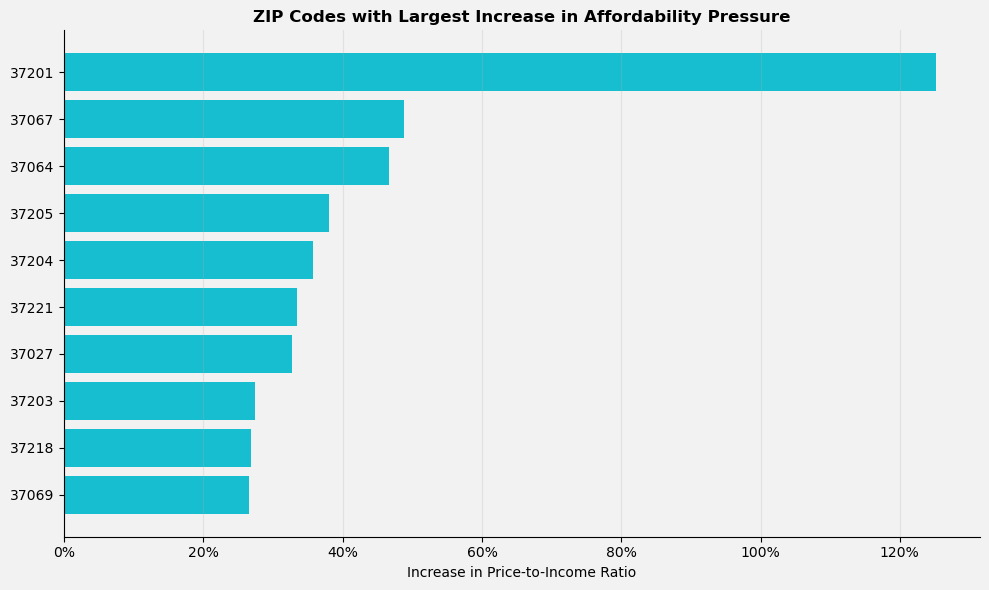

In [155]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.barh(
    top_changes['ZIP'].astype(str),
    top_changes['Affordability_Change_%'],
    color='#17BECF')
plt.title(
    'ZIP Codes with Largest Increase in Affordability Pressure',
    fontweight='bold')
plt.xlabel('Increase in Price-to-Income Ratio')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(lambda x, pos: f'{x:.0f}%')
plt.grid(axis='x', alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('slide_11.png', dpi=300, bbox_inches='tight',facecolor='#F2F2F2')
plt.show()

In [156]:
redfin_metro.to_csv('redfin_metro.csv', index=False)

In [157]:
redfin_zip.to_csv('redfin_zip.csv', index=False)

In [158]:
mortgage_rate.to_csv('mortgage_rate.csv', index=False)

In [159]:
census_data.to_csv('census_data.csv', index=False)